Processing Litecoin...


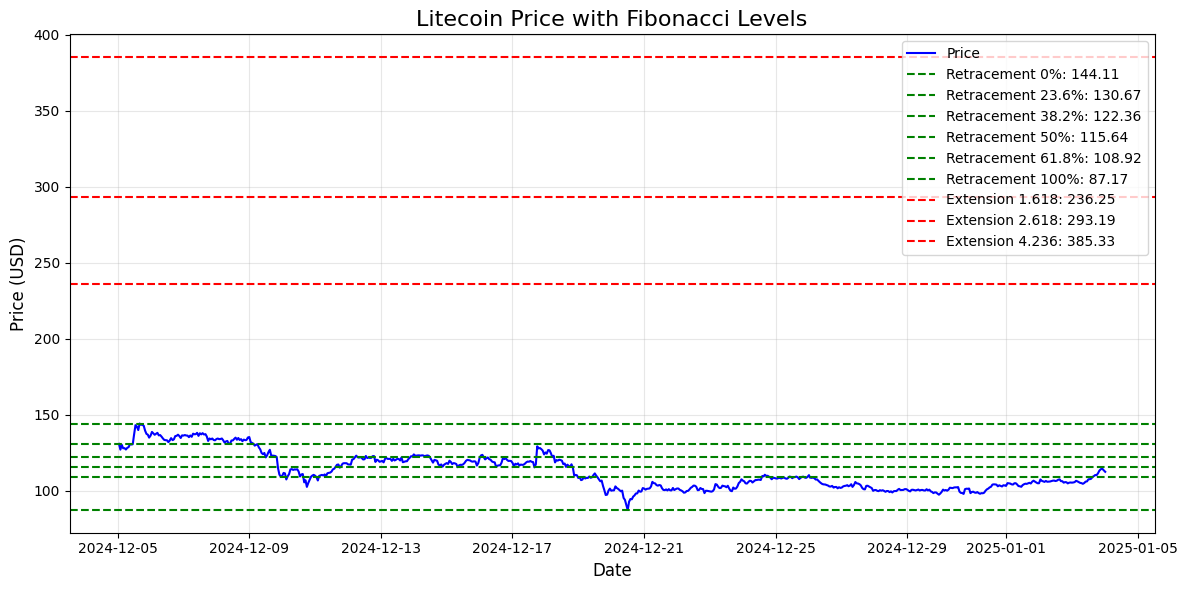

Processing Bitcoin...


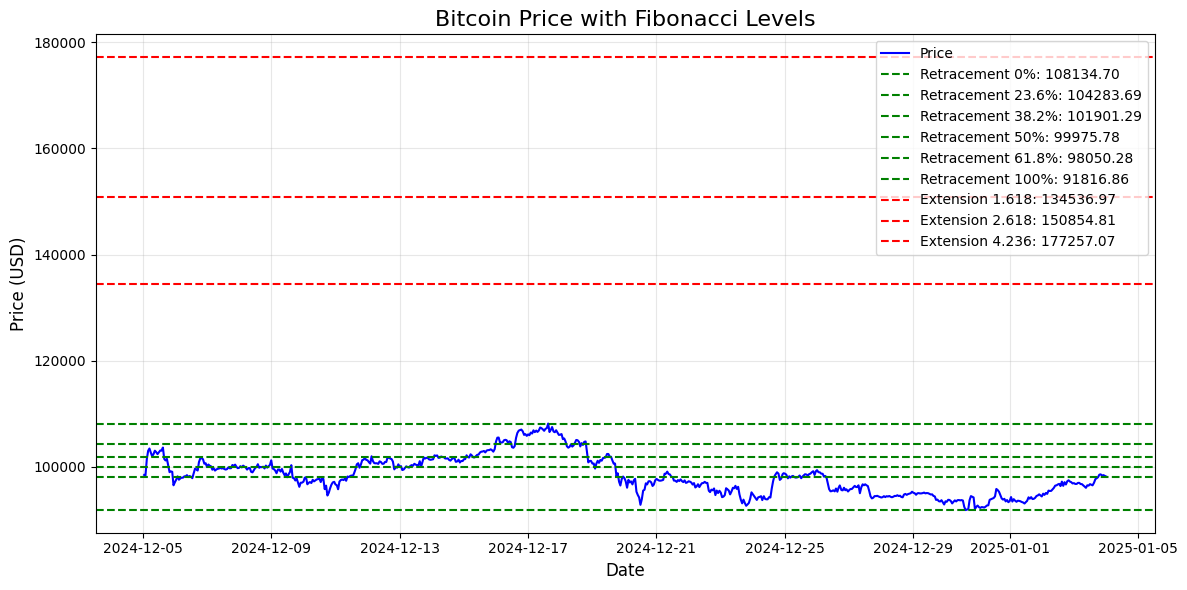

Processing Zilliqa...


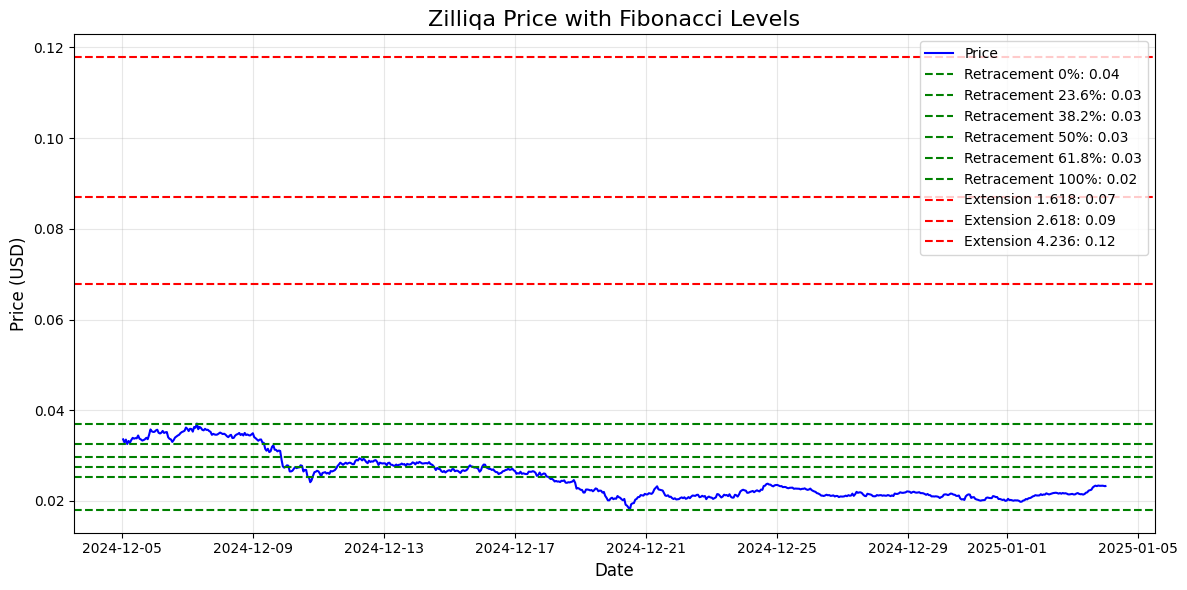

Processing Stellar Lumens...


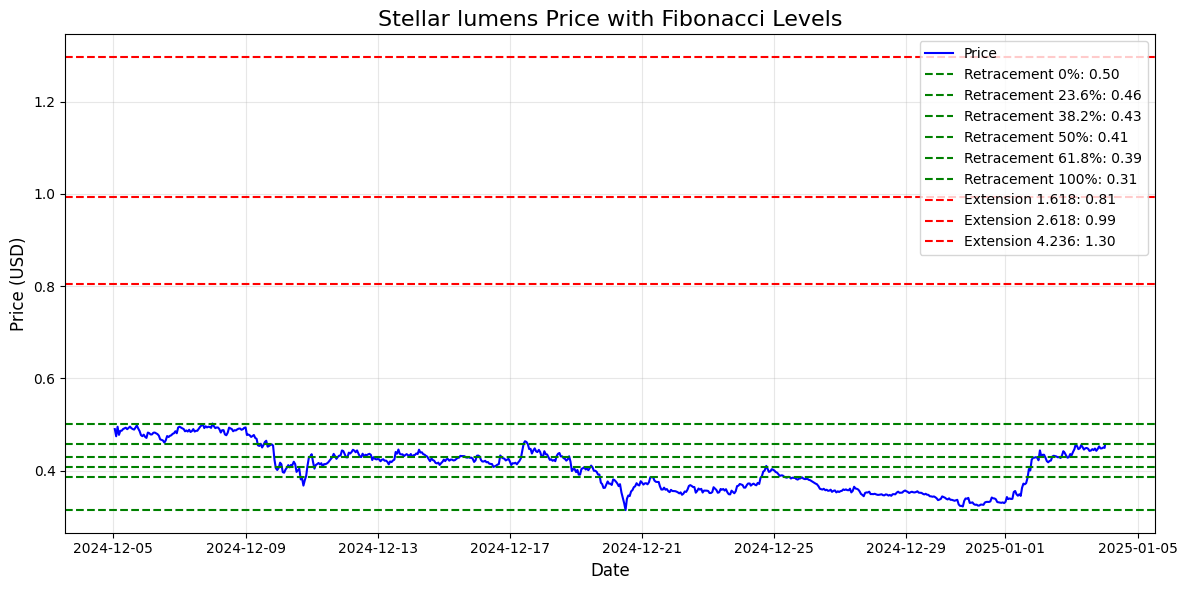

Processing Cardano...
Failed to fetch data for cardano.
No valid data for Cardano.
Processing Dogecoin...
Failed to fetch data for dogecoin.
No valid data for Dogecoin.


In [13]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Function to fetch historical data from CoinGecko
def fetch_coin_data(coin_id, vs_currency, days):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart?vs_currency={vs_currency}&days={days}"
    response = requests.get(url)
    if response.status_code != 200:
        print(f"Failed to fetch data for {coin_id}.")
        return None
    data = response.json()
    prices = data["prices"]
    df = pd.DataFrame(prices, columns=["timestamp", "price"])
    df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms")
    return df

# Function to calculate Fibonacci levels
def calculate_fibonacci_levels(swing_high, swing_low):
    diff = swing_high - swing_low
    retracements = {
        "0%": swing_high,
        "23.6%": swing_high - 0.236 * diff,
        "38.2%": swing_high - 0.382 * diff,
        "50%": swing_high - 0.5 * diff,
        "61.8%": swing_high - 0.618 * diff,
        "100%": swing_low,
    }
    extensions = {
        "1.618": swing_high + 1.618 * diff,
        "2.618": swing_high + 2.618 * diff,
        "4.236": swing_high + 4.236 * diff,
    }
    return retracements, extensions

# Function to plot Fibonacci levels
def plot_fibonacci_levels(coin_id, data, retracements, extensions):
    plt.figure(figsize=(12, 6))
    plt.plot(data["timestamp"], data["price"], label="Price", color="blue")

    # Plot Fibonacci retracement levels
    for level, price in retracements.items():
        plt.axhline(price, linestyle="--", color="green", label=f"Retracement {level}: {price:.2f}")
    
    # Plot Fibonacci extension levels
    for level, price in extensions.items():
        plt.axhline(price, linestyle="--", color="red", label=f"Extension {level}: {price:.2f}")
    
    # Add chart details
    plt.title(f"{coin_id.capitalize()} Price with Fibonacci Levels", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Price (USD)", fontsize=12)
    plt.legend(loc="upper right", fontsize=10)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    
    # Save the plot
    plt.savefig(f"{coin_id}_fibonacci_chart.png")
    plt.show()

# List of cryptocurrencies
cryptos = [
    {"id": "litecoin", "name": "Litecoin"},
    {"id": "bitcoin", "name": "Bitcoin"},
    {"id": "zilliqa", "name": "Zilliqa"},
    {"id": "stellar", "name": "Stellar Lumens"},
    {"id": "cardano", "name": "Cardano"},
    {"id": "dogecoin", "name": "Dogecoin"},
]

# Loop through each cryptocurrency
for crypto in cryptos:
    coin_id = crypto["id"]
    name = crypto["name"]
    
    # Fetch data
    print(f"Processing {name}...")
    data = fetch_coin_data(coin_id, vs_currency="usd", days=30)
    
    if data is not None and not data.empty:
        # Calculate Fibonacci levels
        swing_high = data["price"].max()
        swing_low = data["price"].min()
        retracements, extensions = calculate_fibonacci_levels(swing_high, swing_low)
        
        # Plot Fibonacci levels
        plot_fibonacci_levels(name, data, retracements, extensions)
    else:
        print(f"No valid data for {name}.")

